# Imports

In [3]:
import os
import sys
from pathlib import Path
import itertools
import shutil
import time
import h5py
from itertools import cycle, islice
from datetime import datetime

import torch
from torchvision import transforms
from torchvision.datasets.folder import default_loader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact

import IPython
from IPython.display import Markdown, display, YouTubeVideo

from tqdm.notebook import tqdm

In [4]:
tqdm.pandas()

In [5]:
sys.path.append('/Users/staveshemesh/Projects/shstav2/token_voken/src')
sys.path.append('/Users/staveshemesh/Projects/shstav2/token_voken')
from src.common.setup import syspath_append_projects
syspath_append_projects()
from src.common.path_resolvers import *
from src.common.constants import *
from src.common.display_utils import *
from src.common.commands import *
from src.common.status import *

In [3]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_colwidth = 300

# Read Data

## Constants for Paths

In [6]:
DATA_ROOT = '/Users/staveshemesh/Projects/shstav2/token_voken/data/'
INTERVALS_FILE = '20210506_135358_df_intervals_batch1_431.csv'
INTERVALS_PATH = os.path.join(DATA_ROOT, INTERVALS_FILE)
DATASET_FILE = '20210510_190411_df_dataset_batch1_15659.csv'
DATASET_PATH = os.path.join(DATA_ROOT, DATASET_FILE)

## DataFrames

In [7]:
df_dataset = pd.read_csv(DATASET_PATH, dtype={'interval_id': object, 'frame_selected': object})

In [9]:
df_dataset.iloc[0].frame_face_path

'/Users/staveshemesh/Projects/PATS_DATA/Youtube/oliver/Tt-mpuR_QHQ/100913/vokens/face_annot_224/00002/detected_face_0.png'

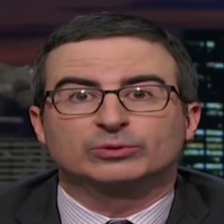

In [10]:
IPython.display.Image(df_dataset.iloc[0].frame_face_path)

In [13]:
df_dataset['interval_id'].nunique()

431

In [11]:
df_dataset['has_path'] = df_dataset.frame_face_path.apply(os.path.exists)
df_with_caption(df_dataset['has_path'].value_counts().to_frame(), 'Existing Frames')

,has_path
True,14701
False,958


In [14]:
PATS_SPEAKER_DATASET_DIR

'/Users/staveshemesh/Projects/PATS_DATA/Datasets/oliver'

In [15]:
SPEAKER_NAME

'oliver'

In [17]:
existing_face_images = os.listdir(PATS_SPEAKER_DATASET_DIR)

In [18]:
already_exist = []

def copy_to_repositoy(row):
    target_filename = f"{SPEAKER_NAME}_{row['video_id']}_{row['interval_id']}_{row['frame_selected'].zfill(5)}"
    if target_filename in existing_face_images:
        already_exist.append(target_filename)
        return    
    targert_filepath = os.path.join(PATS_SPEAKER_DATASET_DIR + '2', target_filename)
    if np.random.choice([0, 1], p=[.99, .01]):
        print(f"cp {row['frame_face_path']} → {targert_filepath}")
    shutil.copyfile(row['frame_face_path'], targert_filepath)

In [19]:
df_dataset[df_dataset['has_path']].progress_apply(copy_to_repositoy, axis=1)

cp /Users/staveshemesh/Projects/PATS_DATA/Youtube/oliver/gvZSpET11ZY/101747/vokens/face_annot_224/00000/detected_face_0.png → /Users/staveshemesh/Projects/PATS_DATA/Datasets/oliver2/oliver_gvZSpET11ZY_101747_00000
cp /Users/staveshemesh/Projects/PATS_DATA/Youtube/oliver/gvZSpET11ZY/101749/vokens/face_annot_224/00078/detected_face_0.png → /Users/staveshemesh/Projects/PATS_DATA/Datasets/oliver2/oliver_gvZSpET11ZY_101749_00078
cp /Users/staveshemesh/Projects/PATS_DATA/Youtube/oliver/gvZSpET11ZY/101769/vokens/face_annot_224/00190/detected_face_0.png → /Users/staveshemesh/Projects/PATS_DATA/Datasets/oliver2/oliver_gvZSpET11ZY_101769_00190
cp /Users/staveshemesh/Projects/PATS_DATA/Youtube/oliver/gvZSpET11ZY/101769/vokens/face_annot_224/00259/detected_face_0.png → /Users/staveshemesh/Projects/PATS_DATA/Datasets/oliver2/oliver_gvZSpET11ZY_101769_00259
cp /Users/staveshemesh/Projects/PATS_DATA/Youtube/oliver/gvZSpET11ZY/101791/vokens/face_annot_224/00055/detected_face_0.png → /Users/staveshemes

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
15629    None
15630    None
15631    None
15632    None
15633    None
15634    None
15635    None
15636    None
15637    None
15638    None
15639    None
15640    None
15641    None
15642    None
15643    None
15644    None
15645    None
15646    None
15647    None
15648    None
15649    None
15650    None
15651    None
15652    None
15653    None
15654    None
15655    None
15656    None
15657    None
15658    None
Length: 14701, dtype: object

In [20]:
len(already_exist)

6604

In [22]:
! find {PATS_SPEAKER_DATASET_DIR} -maxdepth 1 -type f | wc -l

    6060


In [24]:
! find {PATS_SPEAKER_DATASET_DIR + '2'} -maxdepth 1 -type f | wc -l

    7217
